In [26]:
library(randomForest)
library(randomForestCI)
library(dplyr)
library(ggplot2)

## see : http://blog.revolutionanalytics.com/2016/03/confidence-intervals-for-random-forest.html

Error: Incomplete code

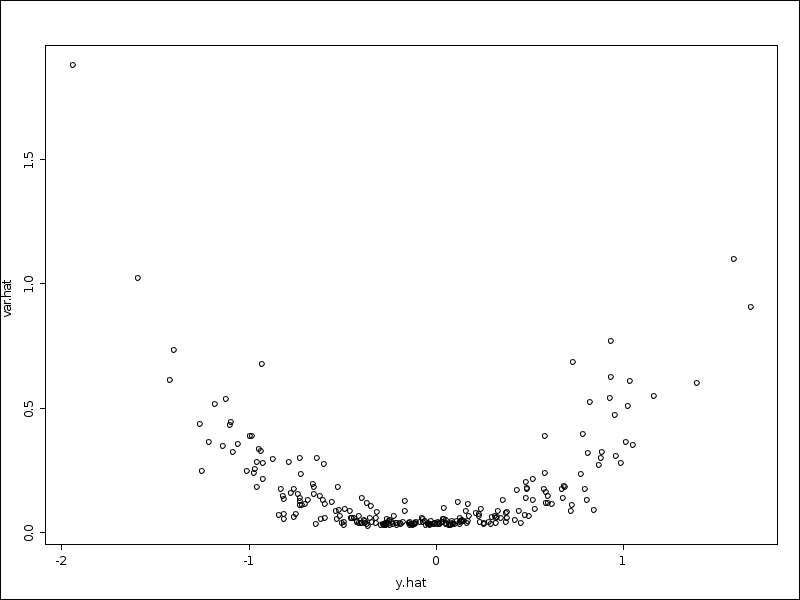

In [3]:
n = 250
p = 100
X = matrix(rnorm(n * p), n, p)
Y = rnorm(n)

rf = randomForest(X, Y, keep.inbag = TRUE, replace = TRUE)

ij = randomForestInfJack(rf, X, calibrate = TRUE)

plot(ij)

In [13]:
df <- data.frame(y = Y, ij)
df <- mutate(df, se = sqrt(var.hat))

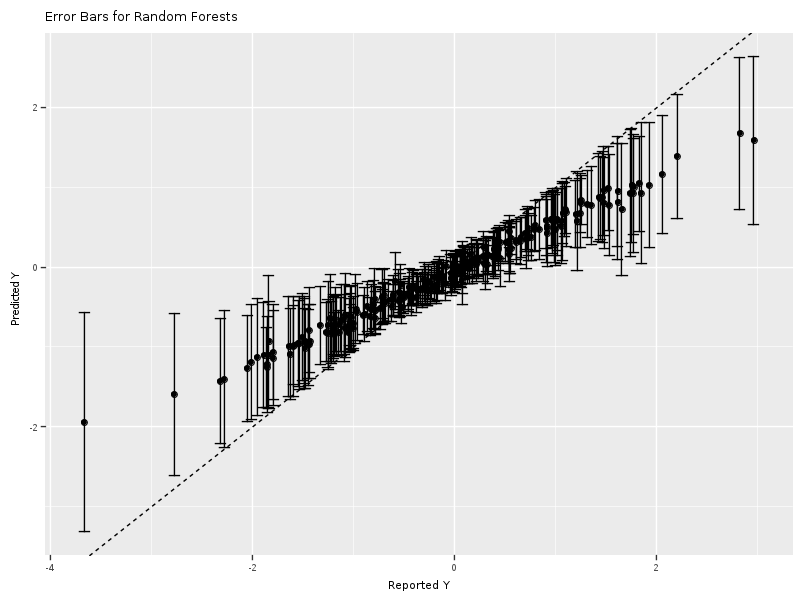

In [28]:
p1 <- ggplot(df, aes(x = y, y = y.hat))

p1 + geom_errorbar(aes(ymin=y.hat-se, ymax=y.hat+se), width=.1) +
          geom_point() + 
          geom_abline(intercept=0, slope=1, linetype=2) +
          xlab("Reported Y") +
          ylab("Predicted Y") +
          ggtitle("Error Bars for Random Forests")